# *World Cup 2023 Data Analysis*

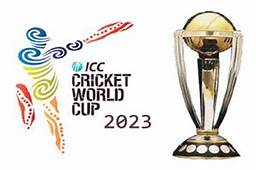

# *Dataset Overview*
- team: 2 or 3 letter code matching that used in player name description.

- player: Standard name used in statsguru innings database. Note: this may not match standard name used in statsguru for teamlists.

- bat_or_bowl: indicates whether row represents a batting or bowling innings

- bb_bf: Ball Bowled or Balls Faced. Provides a consistent and clean statistic. For bowlers, this is a cleaned version of number of overs bowled. So 1.5 overs becomes 11 in the bb_bf column.

- runs: Either runs score by batsman or conceded by bowler. If a batsman produces a not out innings, the data is cleaned to only show the score (eg 100, rather than 100*). Reference can be made to the not_out column to determine if the batsman was out or not.

- wkts: Number of wickets taken by a bowler in this innings.

- wicketball_prob: Number of wickets taken (or lost by batsman) divided by number of balls bowled or faced. Will be zero for a not out batsman. Can be used to represent the probability of taking or losing a wicket in any given delivery. 

- runs_per_ball: Number of runs score or conceded divided by the number of balls bowled or faced. Represents the average runs score or conceded per ball in this innings. 

- opposition: The team this innings was played against

- ground: Which ground in India was the game played

- start_date: Which date the game was played

- overs: Represents the number of overs delivered by each bowler. This is raw data. Compare to the cleaned bb_bf column. A full over is usually 6 deliveries. A partially completed over will be shown as a decimal point where 0.1 represents 1 delivery. So 1.5 overs means the bowler 1 complete over and 5 additional balls for 11 deliveries.

- mdns: Number of maidens a bowler bowled. A maiden is an over of 6 balls that does not concede any runs.

- econ: The average number of runs conceded by the bowler per over in this innings. Compare to runs_per_ball column.

- inns: 1 means this was the first innings of the day. 2 represents the 2nd innings of the day. So a row that includes the value 'bowl' in the bat_or_bowl column and 1 in the inns column indicates the innings in this row occurred when that team bowled first and batted second.

- 4s: How many 4's did the batsman score

- 6s: How many 6's did the batsman score

- sr: The batsman strike rate. This has been converted to runs_per_ball by diving the sr by 100.

- not_out: Whether the batsman's innings was a not out or not. This column removes the need for a * beside the batsman's score.

- mins: Duration of a batsman's inning in minutes.

# *The Necessary Libraries are Imported*

In [1]:
#Import NumPy library for numerical operations
import numpy as np
#Import Pandas library for data manipulation and analysis
import pandas as pd
#Import Seaborn library for statistical data visualization
import seaborn as sns
#Import Plotly Express for interactive data visualization
import plotly.express as px
#Import Matplotlib library for creating static plots
import matplotlib.pyplot as plt

In [2]:
#Suppress warnings to improve code readability
import warnings
warnings.filterwarnings('ignore')

# *Importing Data*

In [3]:
#Read the 'CWC23_all_innings.csv' file into a DataFrame named 'wc'.
wc=pd.read_csv("CWC23_all_innings.csv")
#Display a random sample of 10 rows from the DataFrame 'wc' to get a quick overview of the data.
wc.sample(10)

team                    player bat_or_bowl  bb_bf  runs  wkts  \
810   AFG  Rahmanullah Gurbaz (AFG)         bat     25    21   NaN   
683   PAK  Mohammad Nawaz (3) (PAK)         bat     43    39   NaN   
474   PAK           Usama Mir (PAK)        bowl     48    55   0.0   
1078   NZ           TWM Latham (NZ)         bat      7     5   NaN   
733   IND           RA Jadeja (IND)         bat     15    29   NaN   
372    SL          DM de Silva (SL)        bowl     24    21   0.0   
289   NED     PA van Meekeren (NED)        bowl     60    57   1.0   
1000  PAK   Abdullah Shafique (PAK)         bat     17     9   NaN   
598    SA    HE van der Dussen (SA)         bat     61    60   NaN   
218   PAK  Mohammad Nawaz (3) (PAK)        bowl     42    31   1.0   

      wicketball_prob  runs_per_ball      opposition        ground start_date  \
810          0.040000       0.840000     v Australia      Wankhede   7-Nov-23   
683          0.023256       0.906900   v Netherlands     Hyderabad   6-Oct-23   
474          0.000000       1.145833   v Afghanistan       Chennai  23-Oct-23   
1078         0.142857       0.714200         v India    Dharamsala  22-Oct-23   
733          0.000000       1.933300  v South Africa  Eden Gardens   5-Nov-23   
372          0.000000       0.875000   v Afghanistan          Pune  30-Oct-23   
289          0.016667       0.950000       v England          Pune   8-Nov-23   
1000         0.058824       0.529400  v South Africa       Chennai  27-Oct-23   
598          0.016393       0.983600       v England      Wankhede  21-Oct-23   
218          0.023810       0.738095   v Netherlands     Hyderabad   6-Oct-23   

      overs  mdns  econ  inns   4s   6s      sr  not_out  mins  
810     NaN   NaN   NaN     1  2.0  0.0   84.00      0.0  38.0  
683     NaN   NaN   NaN     1  4.0  0.0   90.69      0.0  66.0  
474     8.0   0.0  6.87     2  NaN  NaN     NaN      NaN   NaN  
1078    NaN   NaN   NaN     1  1.0  0.0   71.42      0.0  16.0  
733     NaN   NaN   NaN     1  3.0  1.0  193.33      1.0  21.0  
372     4.0   0.0  5.25     2  NaN  NaN     NaN      NaN   NaN  
289    10.0   0.0  5.70     1  NaN  NaN     NaN      NaN   NaN  
1000    NaN   NaN   NaN     1  1.0  0.0   52.94      0.0  21.0  
598     NaN   NaN   NaN     1  8.0  0.0   98.36      0.0  86.0  
218     7.0   0.0  4.42     2  NaN  NaN     NaN      NaN   NaN

# *Data Understanding*

In [4]:
#Provide a concise summary of the DataFrame 'wc', including the data types, non-null counts, and memory usage.
wc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408 entries, 0 to 1407
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   team             1408 non-null   object 
 1   player           1408 non-null   object 
 2   bat_or_bowl      1408 non-null   object 
 3   bb_bf            1408 non-null   int64  
 4   runs             1408 non-null   int64  
 5   wkts             562 non-null    float64
 6   wicketball_prob  1408 non-null   float64
 7   runs_per_ball    1408 non-null   float64
 8   opposition       1408 non-null   object 
 9   ground           1408 non-null   object 
 10  start_date       1408 non-null   object 
 11  overs            562 non-null    float64
 12  mdns             562 non-null    float64
 13  econ             562 non-null    float64
 14  inns             1408 non-null   int64  
 15  4s               846 non-null    float64
 16  6s               846 non-null    float64
 17  sr            

In [5]:
#Generate descriptive statistics for the DataFrame 'wc' and transpose the result for better readability
wc.describe().T

count       mean        std   min        25%        50%  \
bb_bf            1408.0  35.305398  25.248709  0.00  13.750000  32.000000   
runs             1408.0  33.237216  28.056329  0.00  11.000000  29.000000   
wkts              562.0   1.204626   1.198237  0.00   0.000000   1.000000   
wicketball_prob  1408.0   0.070574   0.152535  0.00   0.010724   0.032258   
runs_per_ball    1408.0   0.898755   0.471051  0.00   0.621350   0.879005   
overs             562.0   7.342527   2.679736  0.30   5.550000   8.000000   
mdns              562.0   0.256228   0.532547  0.00   0.000000   0.000000   
econ              562.0   5.946637   2.141566  1.35   4.500000   5.675000   
inns             1408.0   1.470881   0.499329  1.00   1.000000   1.000000   
4s                846.0   2.605201   3.146922  0.00   0.000000   2.000000   
6s                846.0   0.751773   1.504184  0.00   0.000000   0.000000   
sr                846.0  83.716596  52.475444  0.00  51.610000  81.810000   
not_out           846.0   0.151300   0.358553  0.00   0.000000   0.000000   
mins              846.0  42.721040  41.576908  1.00  12.000000  28.000000   

                        75%    max  
bb_bf             54.000000  143.0  
runs              49.000000  201.0  
wkts               2.000000    7.0  
wicketball_prob    0.062500    1.0  
runs_per_ball      1.130819    6.0  
overs             10.000000   10.0  
mdns               0.000000    3.0  
econ               7.120000   16.0  
inns               2.000000    2.0  
4s                 4.000000   21.0  
6s                 1.000000   11.0  
sr               107.020000  600.0  
not_out            0.000000    1.0  
mins              60.000000  217.0

In [6]:
wc.shape

(1408, 20)

In [7]:
#Display the column names of the DataFrame 'wc'
wc.columns

Index(['team', 'player', 'bat_or_bowl', 'bb_bf', 'runs', 'wkts',
       'wicketball_prob', 'runs_per_ball', 'opposition', 'ground',
       'start_date', 'overs', 'mdns', 'econ', 'inns', '4s', '6s', 'sr',
       'not_out', 'mins'],
      dtype='object')

# *Converting necessary column to datetime object*

In [8]:
#Convert the 'start_date' column of DataFrame 'wc' to datetime format
wc['start_date']=pd.to_datetime(wc['start_date'])
#Display the data types of each column in the DataFrame 'wc' after converting 'start_date' to datetime
wc.dtypes

team                       object
player                     object
bat_or_bowl                object
bb_bf                       int64
runs                        int64
wkts                      float64
wicketball_prob           float64
runs_per_ball             float64
opposition                 object
ground                     object
start_date         datetime64[ns]
overs                     float64
mdns                      float64
econ                      float64
inns                        int64
4s                        float64
6s                        float64
sr                        float64
not_out                   float64
mins                      float64
dtype: object

# *Handling Missing Value*

In [9]:
#Display the count of missing values in each column of the DataFrame 'wc'
wc.isna().sum()

team                 0
player               0
bat_or_bowl          0
bb_bf                0
runs                 0
wkts               846
wicketball_prob      0
runs_per_ball        0
opposition           0
ground               0
start_date           0
overs              846
mdns               846
econ               846
inns                 0
4s                 562
6s                 562
sr                 562
not_out            562
mins               562
dtype: int64

In [10]:
columns_to_impute_zero=['wkts','overs','mdns','4s','6s','not_out']
columns_to_impute_median=['econ','sr','mins']

#Fill NaN with 0 for specified columns
for column in columns_to_impute_zero:
    wc[column].fillna(0,inplace=True)

#Fill NaN with median for specified columns
for column in columns_to_impute_median:
    median_value=wc[column].median()
    wc[column].fillna(median_value,inplace=True)

In [11]:
#Check if there are still any missing values in the modified DataFrame 'wc'
wc.isnull().sum()

team               0
player             0
bat_or_bowl        0
bb_bf              0
runs               0
wkts               0
wicketball_prob    0
runs_per_ball      0
opposition         0
ground             0
start_date         0
overs              0
mdns               0
econ               0
inns               0
4s                 0
6s                 0
sr                 0
not_out            0
mins               0
dtype: int64

# *Checking for Duplicates*

In [12]:
#Find duplicate rows in the DataFrame 'wc'
wc[wc.duplicated()]

team                   player bat_or_bowl  bb_bf  runs  wkts  \
1314  ENG       AAP Atkinson (ENG)         bat      1     0   0.0   
1315  PAK  Abdullah Shafique (PAK)         bat      2     0   0.0   

      wicketball_prob  runs_per_ball  opposition        ground start_date  \
1314              1.0            0.0  v Pakistan  Eden Gardens 2023-11-11   
1315              0.5            0.0   v England  Eden Gardens 2023-11-11   

      overs  mdns   econ  inns   4s   6s   sr  not_out  mins  
1314    0.0   0.0  5.675     1  0.0  0.0  0.0      0.0   1.0  
1315    0.0   0.0  5.675     2  0.0  0.0  0.0      0.0   2.0

In [13]:
#Remove duplicate rows from the DataFrame 'wc' and modify it in-place
wc.drop_duplicates(inplace=True)
#Check if there are still any duplicate rows in the modified DataFrame 'wc'
wc[wc.duplicated()].count()

team               0
player             0
bat_or_bowl        0
bb_bf              0
runs               0
wkts               0
wicketball_prob    0
runs_per_ball      0
opposition         0
ground             0
start_date         0
overs              0
mdns               0
econ               0
inns               0
4s                 0
6s                 0
sr                 0
not_out            0
mins               0
dtype: int64

# *Exploratory Data Analysis*

In [14]:
#The correlation matrix for the DataFrame 'wc', providing a measure of the linear relationship between pairs of columns
wc.corr()

bb_bf      runs      wkts  wicketball_prob  runs_per_ball  \
bb_bf            1.000000  0.887155  0.317867        -0.388580       0.123522   
runs             0.887155  1.000000  0.234456        -0.352260       0.413271   
wkts             0.317867  0.234456  1.000000        -0.068131       0.006891   
wicketball_prob -0.388580 -0.352260 -0.068131         1.000000      -0.350594   
runs_per_ball    0.123522  0.413271  0.006891        -0.350594       1.000000   
overs            0.430235  0.368342  0.705550        -0.208502       0.092223   
mdns             0.167116  0.031795  0.387346        -0.064129      -0.106050   
econ            -0.072429  0.226627 -0.128069        -0.043501       0.492950   
inns            -0.060893 -0.086563 -0.010034         0.037464      -0.079275   
4s               0.495995  0.557107 -0.285692        -0.165560       0.197192   
6s               0.368147  0.526731 -0.185598        -0.115949       0.310995   
sr               0.139269  0.311210 -0.015626        -0.345272       0.858631   
not_out         -0.056579 -0.010530 -0.158781        -0.146739       0.173024   
mins             0.766397  0.705668 -0.135231        -0.308587       0.118766   

                    overs      mdns      econ      inns        4s        6s  \
bb_bf            0.430235  0.167116 -0.072429 -0.060893  0.495995  0.368147   
runs             0.368342  0.031795  0.226627 -0.086563  0.557107  0.526731   
wkts             0.705550  0.387346 -0.128069 -0.010034 -0.285692 -0.185598   
wicketball_prob -0.208502 -0.064129 -0.043501  0.037464 -0.165560 -0.115949   
runs_per_ball    0.092223 -0.106050  0.492950 -0.079275  0.197192  0.310995   
overs            1.000000  0.387341 -0.018090 -0.032806 -0.420428 -0.273129   
mdns             0.387341  1.000000 -0.300944  0.012696 -0.162431 -0.105522   
econ            -0.018090 -0.300944  1.000000 -0.052490 -0.045485 -0.029549   
inns            -0.032806  0.012696 -0.052490  1.000000 -0.025223 -0.036652   
4s              -0.420428 -0.162431 -0.045485 -0.025223  1.000000  0.583581   
6s              -0.273129 -0.105522 -0.029549 -0.036652  0.583581  1.000000   
sr              -0.022995 -0.008884 -0.002488 -0.065422  0.325696  0.423456   
not_out         -0.233663 -0.090275 -0.025279  0.033349  0.125157  0.176112   
mins            -0.199008 -0.076886 -0.021530 -0.030084  0.795046  0.568973   

                       sr   not_out      mins  
bb_bf            0.139269 -0.056579  0.766397  
runs             0.311210 -0.010530  0.705668  
wkts            -0.015626 -0.158781 -0.135231  
wicketball_prob -0.345272 -0.146739 -0.308587  
runs_per_ball    0.858631  0.173024  0.118766  
overs           -0.022995 -0.233663 -0.199008  
mdns            -0.008884 -0.090275 -0.076886  
econ            -0.002488 -0.025279 -0.021530  
inns            -0.065422  0.033349 -0.030084  
4s               0.325696  0.125157  0.795046  
6s               0.423456  0.176112  0.568973  
sr               1.000000  0.254495  0.183621  
not_out          0.254495  1.000000  0.093001  
mins             0.183621  0.093001  1.000000

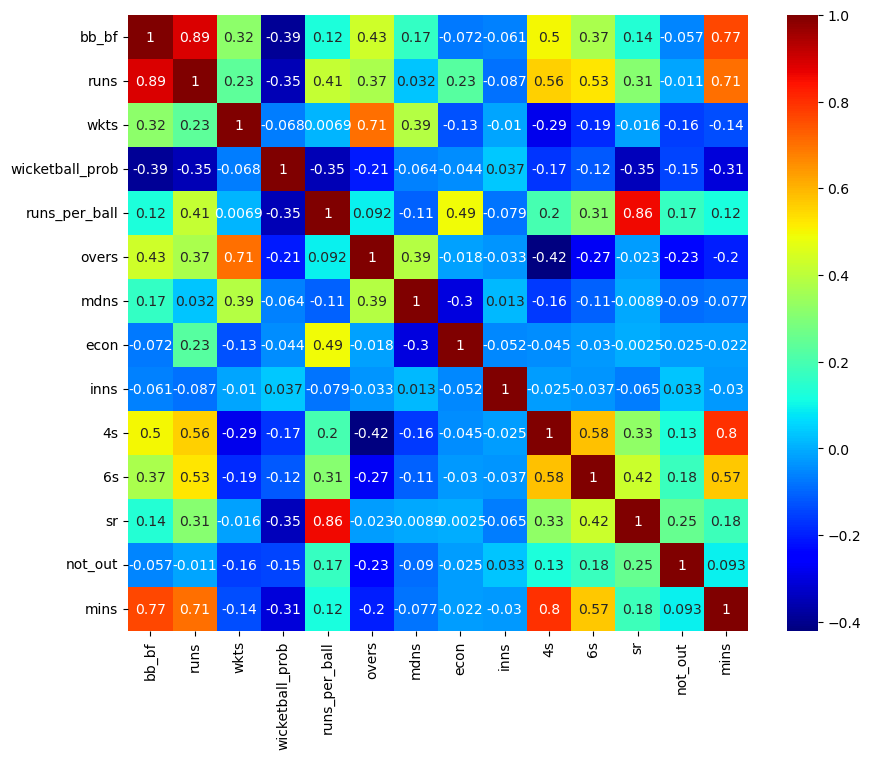

In [15]:
#Create a heatmap of the correlation matrix using Seaborn
plt.figure(figsize=(10,8))
sns.heatmap(wc.corr(),annot=True,cmap='jet')
plt.show()

# *Explore team-wise performance metrics*

In [16]:
#Explore team-wise performance metrics
team_performance=wc.groupby('team').agg({
    'runs': 'sum',
    'wkts': 'sum',
    'bb_bf': 'sum',
    'runs_per_ball': 'mean',
    'econ': 'mean',
    '4s': 'sum',
    '6s': 'sum',
    'sr': 'mean'
}).reset_index()

#Display team-wise performance metrics
print("Team-wise Performance Metrics:")
team_performance

Team-wise Performance Metrics:


team  runs  wkts  bb_bf  runs_per_ball      econ     4s    6s         sr
0  AFG  4134  53.0   4795       0.855123  5.712868  178.0  42.0  79.422713
1  AUS  5234  77.0   5482       0.890978  5.669452  265.0  92.0  84.066774
2  BAN  4358  51.0   4849       0.840755  5.830177  188.0  43.0  76.761631
3  ENG  4396  65.0   4619       0.941635  5.813967  216.0  51.0  87.319133
4  IND  4783  94.0   5191       0.920735  5.342339  265.0  89.0  91.629919
5  NED  4268  63.0   4802       0.809495  5.861146  163.0  33.0  73.032484
6   NZ  5376  71.0   5320       1.000762  5.920937  265.0  82.0  90.377778
7  PAK  4786  65.0   4785       0.940765  5.925551  220.0  60.0  84.650000
8   SA  5097  88.0   5348       0.970307  5.677979  243.0  99.0  92.073050
9   SL  4366  50.0   4516       0.837546  6.039348  201.0  45.0  72.672899

# *Analyze runs scored, wickets taken, and batting/bowling styles*

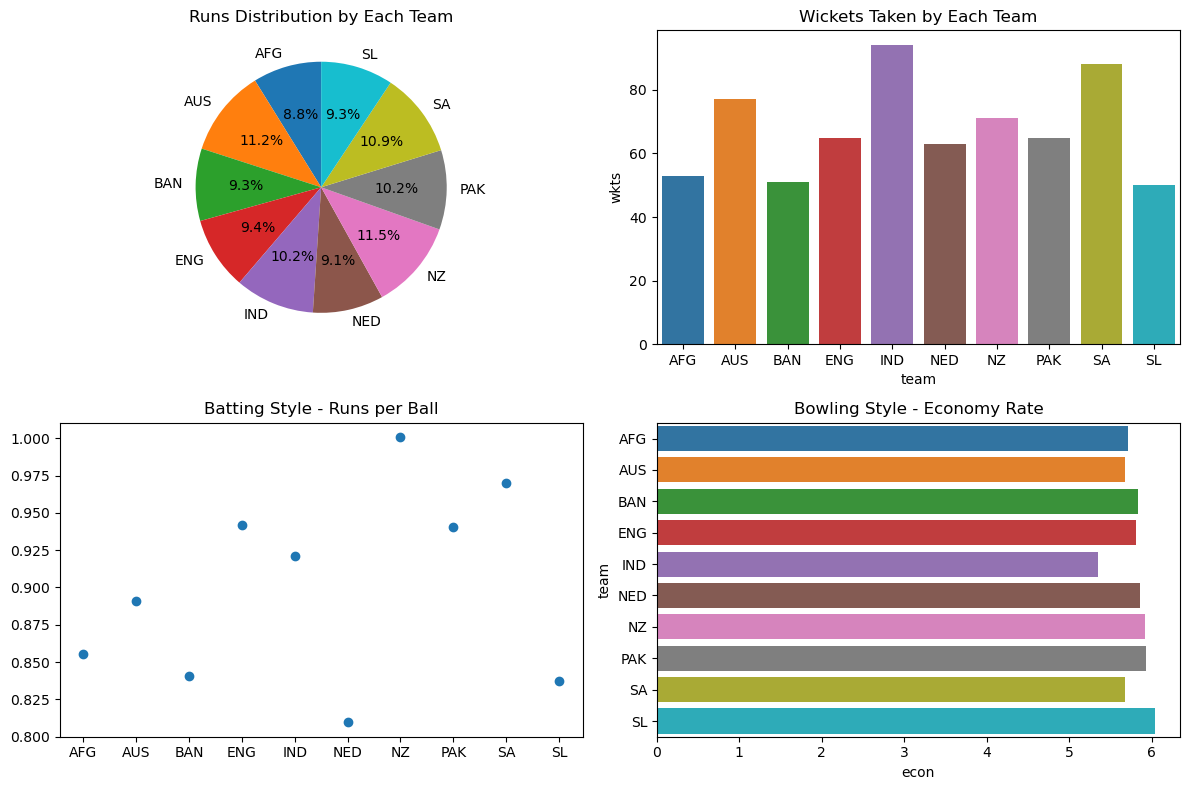

In [17]:
#Analyze runs scored, wickets taken, and batting/bowling styles
plt.figure(figsize=(12,8))

#Runs scored by each team (using a pie chart for distribution)
plt.subplot(2,2,1)
plt.pie(team_performance['runs'],labels=team_performance['team'],autopct='%1.1f%%',startangle=90)
plt.title('Runs Distribution by Each Team')

#Wickets taken by each team
plt.subplot(2,2,2)
sns.barplot(x='team',y='wkts',data=team_performance)
plt.title('Wickets Taken by Each Team')

#Batting style - Runs per ball (using a scatter plot)
plt.subplot(2,2,3)
plt.scatter(team_performance['team'],team_performance['runs_per_ball'])
plt.title('Batting Style - Runs per Ball')

#Bowling style - Economy Rate (using a horizontal bar plot)
plt.subplot(2,2,4)
sns.barplot(x='econ',y='team',data=team_performance)
plt.title('Bowling Style - Economy Rate')

plt.tight_layout()
plt.show()

# *Identify top-performing teams and their strengths*

In [18]:
#Identify top-performing teams and their strengths
top_teams=team_performance.nlargest(5,'runs')  
print("Top Performing Teams:")
top_teams

Top Performing Teams:


team  runs  wkts  bb_bf  runs_per_ball      econ     4s    6s         sr
6   NZ  5376  71.0   5320       1.000762  5.920937  265.0  82.0  90.377778
1  AUS  5234  77.0   5482       0.890978  5.669452  265.0  92.0  84.066774
8   SA  5097  88.0   5348       0.970307  5.677979  243.0  99.0  92.073050
7  PAK  4786  65.0   4785       0.940765  5.925551  220.0  60.0  84.650000
4  IND  4783  94.0   5191       0.920735  5.342339  265.0  89.0  91.629919

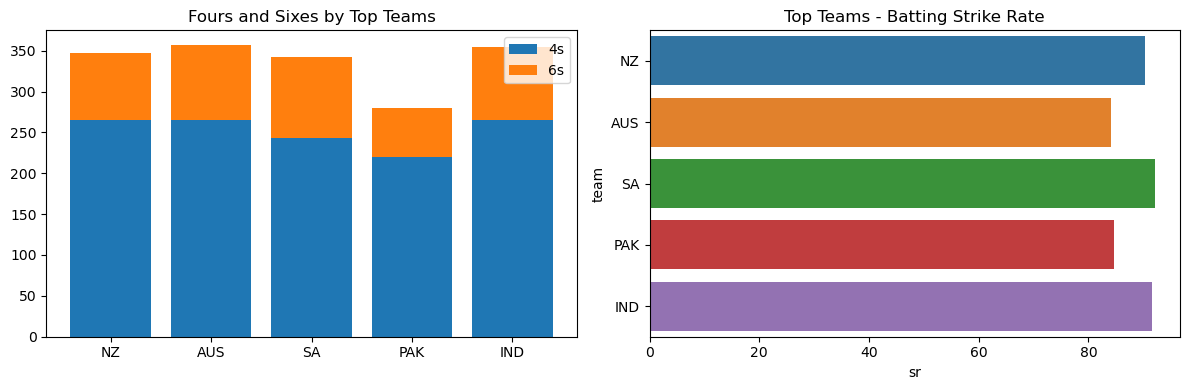

In [19]:
#Display strengths of top-performing teams
plt.figure(figsize=(12,4))

#Fours and Sixes (using a stacked bar plot)
plt.subplot(1,2,1)
plt.bar(top_teams['team'],top_teams['4s'],label='4s')
plt.bar(top_teams['team'],top_teams['6s'],bottom=top_teams['4s'],label='6s')
plt.title('Fours and Sixes by Top Teams')
plt.legend()

#Strike Rate (using a horizontal bar plot)
plt.subplot(1,2,2)
sns.barplot(x='sr',y='team',data=top_teams)
plt.title('Top Teams - Batting Strike Rate')
plt.tight_layout()
plt.show()

# *Evaluate individual player statistics for both batting and bowling*

In [20]:
#Evaluate individual player statistics for both batting and bowling
player_performance=wc.groupby(['team','player','bat_or_bowl']).agg({
    'runs': 'sum',
    'wkts': 'sum',
    'bb_bf': 'sum',
    'runs_per_ball': 'mean',
    'econ': 'mean',
    '4s': 'sum',
    '6s': 'sum',
    'sr': 'mean'
}).reset_index()

#Display player-wise performance metrics
print("Player-wise Performance Metrics:")
player_performance.head(30)

Player-wise Performance Metrics:


team                      player bat_or_bowl  runs  wkts  bb_bf  \
0   AFG    Azmatullah Omarzai (AFG)         bat   353   0.0    361   
1   AFG    Azmatullah Omarzai (AFG)        bowl   270   7.0    228   
2   AFG      Fazalhaq Farooqi (AFG)         bat     2   0.0      6   
3   AFG      Fazalhaq Farooqi (AFG)        bowl   228   6.0    240   
4   AFG  Hashmatullah Shahidi (AFG)         bat   310   0.0    424   
5   AFG        Ibrahim Zadran (AFG)         bat   376   0.0    493   
6   AFG         Ikram Alikhil (AFG)         bat    89   0.0    101   
7   AFG         Mohammad Nabi (AFG)         bat    55   0.0     76   
8   AFG         Mohammad Nabi (AFG)        bowl   254   8.0    369   
9   AFG      Mujeeb Ur Rahman (AFG)         bat    51   0.0     40   
10  AFG      Mujeeb Ur Rahman (AFG)        bowl   458   8.0    491   
11  AFG     Najibullah Zadran (AFG)         bat     7   0.0     21   
12  AFG         Naveen-ul-Haq (AFG)         bat    16   0.0     25   
13  AFG         Naveen-ul-Haq (AFG)        bowl   352   8.0    322   
14  AFG            Noor Ahmad (AFG)         bat    26   0.0     32   
15  AFG            Noor Ahmad (AFG)        bowl   182   5.0    228   
16  AFG    Rahmanullah Gurbaz (AFG)         bat   280   0.0    283   
17  AFG           Rahmat Shah (AFG)         bat   320   0.0    419   
18  AFG           Rahmat Shah (AFG)        bowl    12   0.0      6   
19  AFG           Rashid Khan (AFG)         bat   105   0.0    111   
20  AFG           Rashid Khan (AFG)        bowl   388  11.0    519   
21  AUS               A Zampa (AUS)         bat    48   0.0     60   
22  AUS               A Zampa (AUS)        bowl   471  22.0    516   
23  AUS              AT Carey (AUS)         bat     0   0.0      2   
24  AUS               C Green (AUS)         bat    63   0.0     83   
25  AUS               C Green (AUS)        bowl    11   0.0     12   
26  AUS             DA Warner (AUS)         bat   528   0.0    491   
27  AUS            GJ Maxwell (AUS)         bat   398   0.0    265   
28  AUS            GJ Maxwell (AUS)        bowl   295   5.0    375   
29  AUS             JP Inglis (AUS)         bat   159   0.0    168   

    runs_per_ball       econ    4s    6s          sr  
0        1.003537   5.675000  26.0  13.0  100.353750  
1        1.145944   6.873333   0.0   0.0   81.810000  
2        0.250000   5.675000   0.0   0.0   25.000000  
3        0.984656   5.906667   0.0   0.0   81.810000  
4        0.629200   5.675000  25.0   2.0   62.920000  
5        0.736289   5.675000  39.0   5.0   73.628889  
6        0.880167   5.675000   7.0   3.0   88.016667  
7        0.741333   5.675000   3.0   1.0   74.133333  
8        0.811834   4.868889   0.0   0.0   81.810000  
9        1.153320   5.675000   6.0   2.0  115.332000  
10       0.944660   5.666667   0.0   0.0   81.810000  
11       0.317300   5.675000   0.0   0.0   31.730000  
12       0.491660   5.675000   2.0   0.0   49.166000  
13       1.101781   6.608750   0.0   0.0   81.810000  
14       0.812500   5.675000   4.0   0.0   81.250000  
15       0.795370   4.770000   0.0   0.0   81.810000  
16       0.838556   5.675000  31.0   9.0   83.855556  
17       0.707456   5.675000  28.0   2.0   70.745556  
18       2.000000  12.000000   0.0   0.0   81.810000  
19       0.994583   5.675000   7.0   5.0   99.458333  
20       0.758390   4.548889   0.0   0.0   81.810000  
21       0.752300   5.675000   5.0   0.0   75.230000  
22       0.897063   5.380000   0.0   0.0   81.810000  
23       0.000000   5.675000   0.0   0.0    0.000000  
24       0.677000   5.675000   6.0   0.0   67.700000  
25       0.916667   5.500000   0.0   0.0   81.810000  
26       1.081995   5.675000  49.0  24.0  108.199000  
27       1.017513   5.675000  40.0  22.0  101.751250  
28       0.821773   4.928571   0.0   0.0   81.810000  
29       0.909062   5.675000  17.0   3.0   90.906250

# *Identify leading run-scorers and wicket-takers*

In [21]:
#Identify leading run-scorers 
leading_run_scorers=player_performance[player_performance['bat_or_bowl']=='bat'].nlargest(10,'runs')

#Visualization using radar chart
fig=px.line_polar(leading_run_scorers,r='runs',theta='player',line_close=True,title='Leading Run-scorers')
fig.update_traces(fill='toself')
fig.show()

In [22]:
#Identify Leading wicket-takers
leading_wicket_takers=player_performance[player_performance['bat_or_bowl']=='bowl'].nlargest(10,'wkts')

#Visualization using radar chart
fig=px.line_polar(leading_wicket_takers,r='wkts',theta='player',line_close=True,title='Leading Wicket-takers')
fig.update_traces(fill='toself')
fig.show()

# *The impact of players on their team's performance*

In [23]:
#Assess the impact of players on their team's performance
team_impact=wc.groupby(['team','player']).agg({
    'runs': 'sum',
    'wkts': 'sum'
}).reset_index()

team_impact

team                      player  runs  wkts
0    AFG    Azmatullah Omarzai (AFG)   623   7.0
1    AFG      Fazalhaq Farooqi (AFG)   230   6.0
2    AFG  Hashmatullah Shahidi (AFG)   310   0.0
3    AFG        Ibrahim Zadran (AFG)   376   0.0
4    AFG         Ikram Alikhil (AFG)    89   0.0
..   ...                         ...   ...   ...
148   SL             MD Shanaka (SL)   144   0.0
149   SL            MDKJ Perera (SL)   149   0.0
150   SL             P Nissanka (SL)   332   0.0
151   SL           PVD Chameera (SL)   202   2.0
152   SL       S Samarawickrama (SL)   373   0.0

[153 rows x 4 columns]

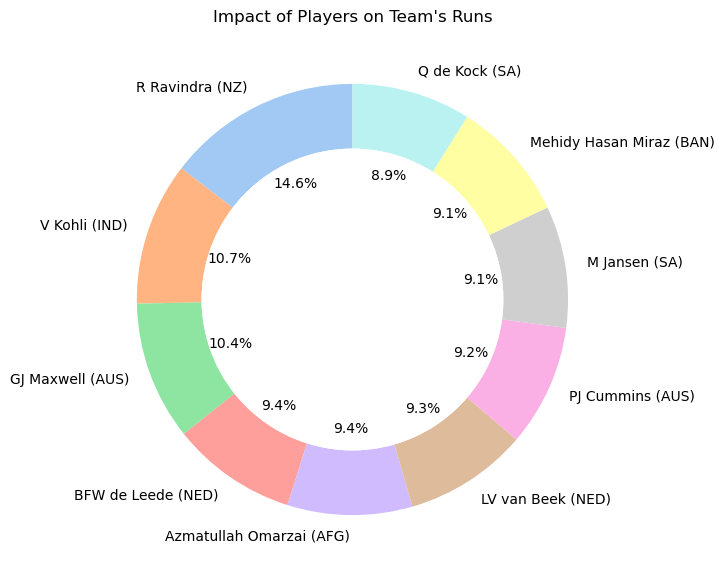

In [24]:
#Create a donut chart using pie chart
plt.figure(figsize=(7,7))

# Data for the pie chart
sizes=team_impact.nlargest(10,'runs')['runs']
labels=team_impact.nlargest(10,'runs')['player']

#Create a pie chart
plt.pie(sizes,labels=labels,autopct='%1.1f%%',startangle=90,wedgeprops=dict(width=0.3),colors=sns.color_palette('pastel'))

#Draw a white circle in the center to create the donut effect
centre_circle=plt.Circle((0,0),0.70,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Impact of Players on Team\'s Runs')
plt.show()

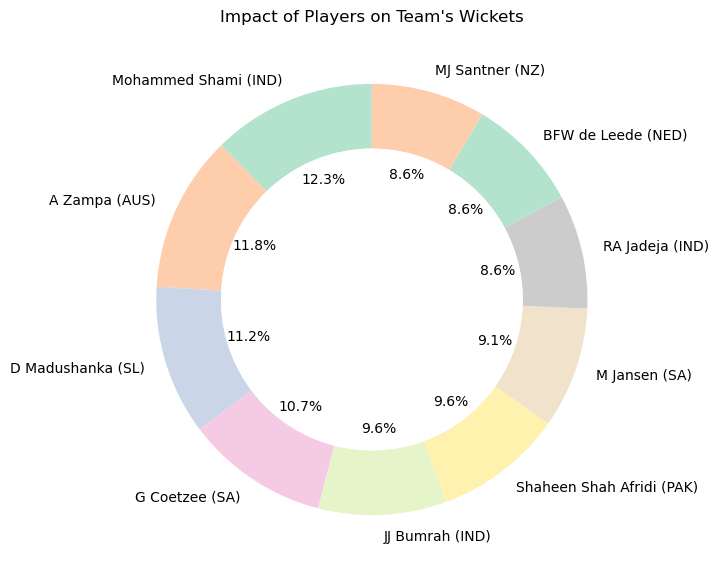

In [25]:
#Create a donut chart using pie chart
plt.figure(figsize=(7,7))

#Data for the pie chart
sizes=team_impact.nlargest(10,'wkts')['wkts']
labels=team_impact.nlargest(10,'wkts')['player']

# Create a pie chart
plt.pie(sizes,labels=labels,autopct='%1.1f%%',startangle=90,wedgeprops=dict(width=0.3),colors=sns.color_palette('Pastel2'))

# Draw a white circle in the center to create the donut effect
centre_circle=plt.Circle((0,0),0.70,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Impact of Players on Team\'s Wickets')
plt.show()

# *Teams and players perform against different oppositions*

In [26]:
#Investigate how teams and players perform against different oppositions
team_opposition_performance=wc.groupby(['team','opposition']).agg({
    'runs': 'sum',
    'wkts': 'sum',
    'bb_bf': 'sum',
    'runs_per_ball': 'mean',
    'econ': 'mean',
    '4s': 'sum',
    '6s': 'sum',
    'sr': 'mean'
}).reset_index()

#Display team's performance against different oppositions
print("Team's Performance Against Different Oppositions:")
team_opposition_performance.sample(10)

Team's Performance Against Different Oppositions:


team      opposition  runs  wkts  bb_bf  runs_per_ball      econ    4s  \
72  PAK     v Sri Lanka   659   9.0    591       1.146864  6.177500  26.0   
34  ENG  v South Africa   549   7.0    433       1.193413  6.554375  18.0   
30  ENG         v India   346   8.0    509       0.583627  5.356765  10.0   
64  PAK   v Afghanistan   551   2.0    595       0.949310  5.757857  17.0   
37  IND     v Australia   386  10.0    546       0.624166  5.106667  14.0   
5   AFG   v New Zealand   418   6.0    508       0.739467  5.712647  11.0   
90   SL  v South Africa   733   5.0    570       1.085469  6.669118  29.0   
55   NZ   v Afghanistan   417  10.0    509       0.877526  5.006429  19.0   
66  PAK    v Bangladesh   401  10.0    466       0.865571  5.021500  19.0   
74   SA     v Australia   884  17.0   1124       0.715048  5.298966  42.0   

      6s         sr  
72   6.0  99.900833  
34   9.0  99.866250  
30   3.0  59.145882  
64   9.0  88.057857  
37   3.0  65.497500  
5    2.0  68.804706  
90  17.0  87.470000  
55  11.0  93.402143  
66   9.0  91.043000  
74  16.0  72.911034

# *Performance variations across different playing grounds*

In [27]:
#Examine performance variations across different playing grounds
team_ground_performance=wc.groupby(['team','ground']).agg({
    'runs': 'sum',
    'wkts': 'sum',
    'bb_bf': 'sum',
    'runs_per_ball': 'mean',
    'econ': 'mean',
    '4s': 'sum',
    '6s': 'sum',
    'sr': 'mean'
}).reset_index()

#Display team's performance across different playing grounds
print("Team's Performance Across Different Grounds:")
team_ground_performance.head(10)

Team's Performance Across Different Grounds:


team      ground  runs  wkts  bb_bf  runs_per_ball      econ    4s    6s  \
0  AFG   Ahmedabad   473   5.0    585       0.884476  6.009167  20.0   6.0   
1  AFG     Chennai   973  13.0   1103       0.837693  5.785370  39.0   5.0   
2  AFG       Delhi  1005  12.0   1057       0.927211  5.998333  48.0  15.0   
3  AFG  Dharamsala   303   3.0    429       0.626686  5.195625  15.0   2.0   
4  AFG     Lucknow   346   6.0    470       0.772904  4.792273  21.0   0.0   
5  AFG        Pune   471   8.0    569       0.772771  5.325909  19.0   5.0   
6  AFG    Wankhede   563   6.0    582       1.088099  6.170385  16.0   9.0   
7  AUS   Ahmedabad   523  10.0    586       0.929928  5.615588  25.0   3.0   
8  AUS   Bengaluru   639  10.0    573       0.912571  6.106176  29.0  19.0   
9  AUS     Chennai   386   4.0    545       0.632117  5.409706  16.0   2.0   

          sr  
0  77.906667  
1  76.240370  
2  82.674242  
3  65.858125  
4  85.007273  
5  76.118182  
6  94.643077  
7  89.469412  
8  79.551176  
9  63.107647

# *Specific teams or players that excel in certain conditions*

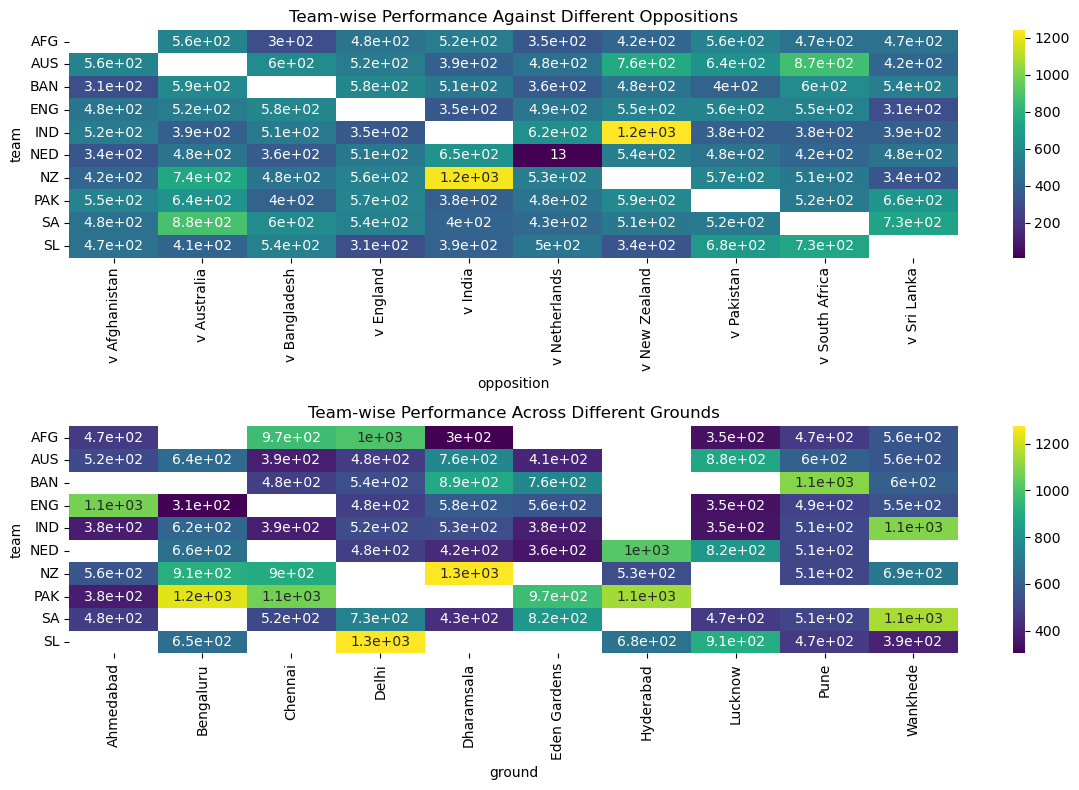

In [28]:
#Identify if there are specific teams or players that excel in certain conditions
plt.figure(figsize=(12,8))

#Team-wise performance against different oppositions (using a heatmap)
plt.subplot(2,1,1)
sns.heatmap(team_opposition_performance.pivot('team','opposition','runs'),annot=True,cmap='viridis')
plt.title('Team-wise Performance Against Different Oppositions')

#Team-wise performance across different playing grounds (using a heatmap)
plt.subplot(2,1,2)
sns.heatmap(team_ground_performance.pivot('team','ground','runs'),annot=True,cmap='viridis')
plt.title('Team-wise Performance Across Different Grounds')
plt.tight_layout()
plt.show()

# *Performance trends over time, considering start dates and overs played*

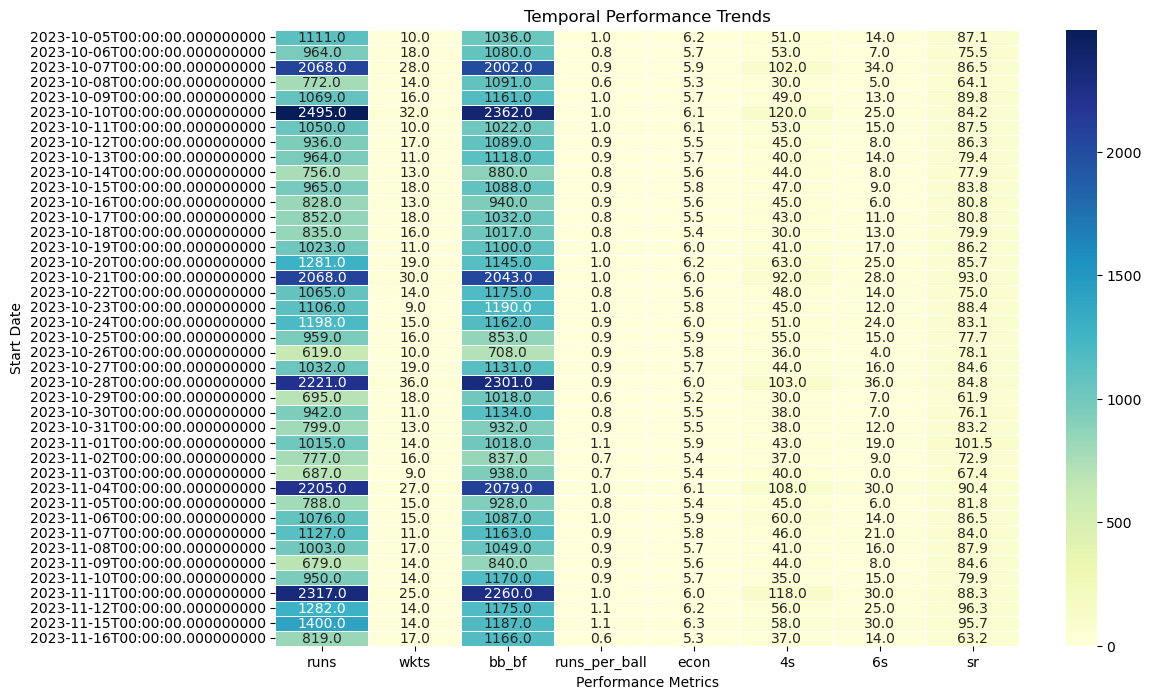

In [29]:
#Study performance trends over time, considering start dates and overs played
temporal_performance=wc.groupby('start_date').agg({
    'runs': 'sum',
    'wkts': 'sum',
    'bb_bf': 'sum',
    'runs_per_ball': 'mean',
    'econ': 'mean',
    '4s': 'sum',
    '6s': 'sum',
    'sr': 'mean'
}).reset_index()

#Create a heatmap for temporal performance trends
plt.figure(figsize=(12,8))
sns.heatmap(temporal_performance.set_index('start_date'),cmap='YlGnBu',annot=True,fmt=".1f",linewidths=.5)
plt.title('Temporal Performance Trends')
plt.xlabel('Performance Metrics')
plt.ylabel('Start Date')
plt.show()

# *Temporal patterns or changes in team and player performance*

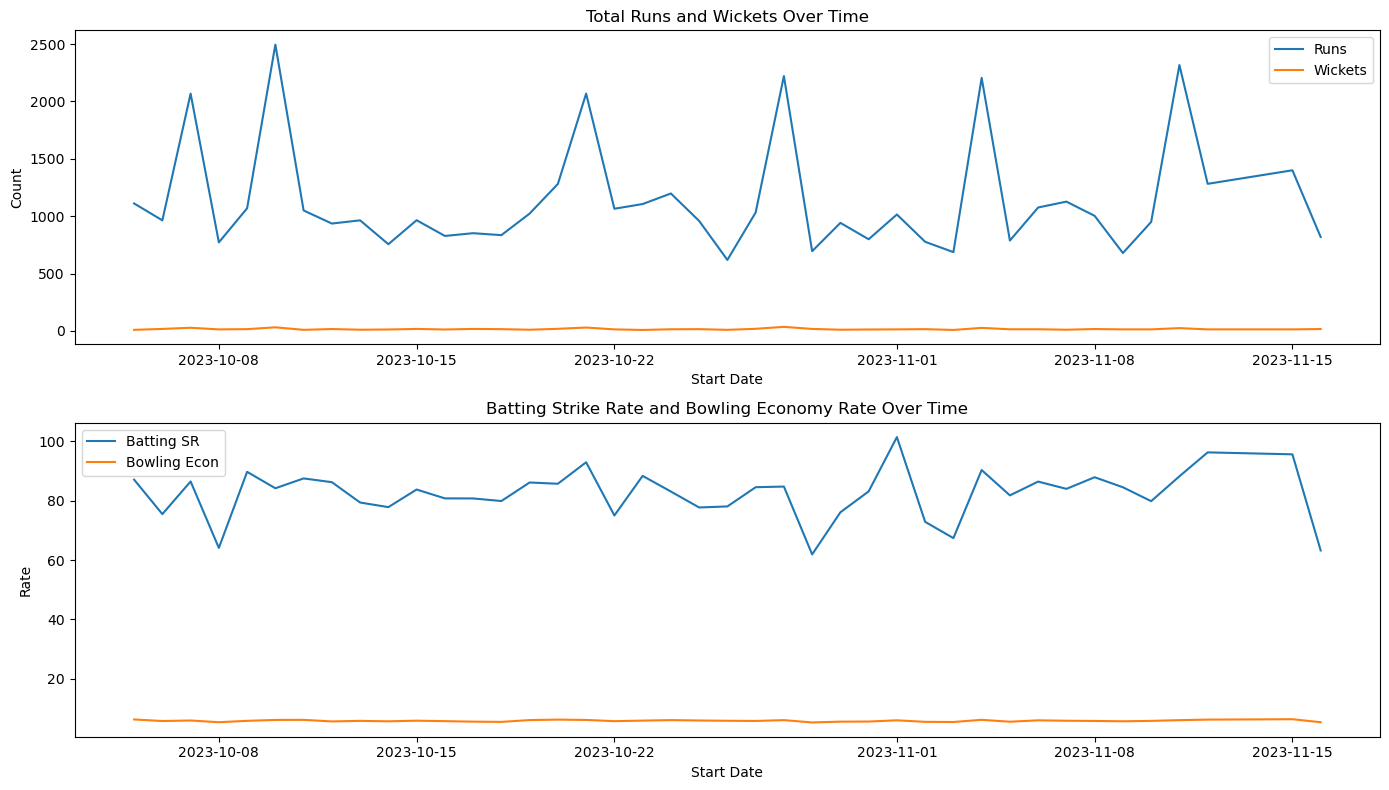

In [30]:
#Identify any temporal patterns or changes in team and player performance
plt.figure(figsize=(14,8))

#Total runs and wickets over time
plt.subplot(2,1,1)
sns.lineplot(x='start_date',y='runs',data=temporal_performance,label='Runs')
sns.lineplot(x='start_date',y='wkts',data=temporal_performance,label='Wickets')
plt.title('Total Runs and Wickets Over Time')
plt.xlabel('Start Date')
plt.ylabel('Count')
plt.legend()

#Batting strike rate and bowling economy rate over time
plt.subplot(2,1,2)
sns.lineplot(x='start_date',y='sr',data=temporal_performance,label='Batting SR')
sns.lineplot(x='start_date',y='econ',data=temporal_performance,label='Bowling Econ')
plt.title('Batting Strike Rate and Bowling Economy Rate Over Time')
plt.xlabel('Start Date')
plt.ylabel('Rate')
plt.legend()
plt.tight_layout()
plt.show()